In [ ]:
from qubecalib.neopulseexp import Sequence, Slot

with Sequence() as seq:
    Slot(100e-9)
    Slot(200e-9)
    Slot(300e-9)

seq._tree.place_slots()
seq, seq._tree._nodes_items

In [ ]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Series():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree()

In [ ]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Flushleft():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree()

In [ ]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Flushright():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree(), seq._tree._tree._cost

In [ ]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with SubSequence():
        Slot(9e-9)
        with Flushright():
            with Series():
                Slot(1e-9)
                Slot(2e-9)
            with Series():
                Slot(3e-9)
                Slot(4e-9)
        with Flushleft():
            with Series():
                Slot(5e-9)
                Slot(6e-9)
            with Series():
                Slot(7e-9)
                Slot(8e-9)

print(seq._tree._nodes_items)
seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree()#, seq._tree._tree._cost


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, Branch
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

%matplotlib inline

with Sequence() as seq:
    with SubSequence():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, Branch):
        print(f"{_.__class__.__name__}, {_.begin}, {_.duration}")
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
ax.set_xlim(0,5)
ax.set_ylim(0,10)
plt.show()

seq._tree._nodes_items, seq._get_tree()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, Branch
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop

%matplotlib inline

with Sequence() as seq:
    with SubSequence():
        Slot(9e-9)
        with Flushright():
            with Series():
                Slot(1e-9)
                Slot(2e-9)
            with Series():
                Slot(3e-9)
                Slot(4e-9)
        Slot(10e-9)
        with Flushleft():
            with Series():
                Slot(5e-9)
                Slot(6e-9)
            with Series():
                Slot(7e-9)
                Slot(8e-9)

seq._tree.place_slots()

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, Branch):
        # print(f"{_.__class__.__name__}, {_.begin}, {_.duration}")
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
ax.set_xlim(0,50)
ax.set_ylim(0,30)
plt.show()

seq._tree._nodes_items, seq._get_tree()#, seq._tree._tree._cost


In [ ]:
import math, cmath
class Test:
    def __init__(self):
        self.amplitude = 1.
        self.phase = 0.
    def __rmul__(self, other: complex):
        p = self.phase / 180. * math.pi
        c = self.amplitude * (math.cos(p) + 1j * math.sin(p))
        r = other * c
        self.amplitude = math.sqrt((r * r.conjugate()).real)
        self.phase = math.atan2(r.imag, r.real)/math.pi * 180
        return self
    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(amplitude={self.amplitude}, phase={self.phase})"


c1 = Test()
0.5 * cmath.exp(1j*math.pi/2) * Test()

[<bound method SequenceTree.branch of <qubecalib.neopulseexp.SequenceTree object at 0x7f031d1c5d60>>, <bound method SequenceTree.branch of <qubecalib.neopulseexp.SequenceTree object at 0x7f031d1c5220>>, <bound method SequenceTree.branch of <qubecalib.neopulseexp.SequenceTree object at 0x7f031d1c51f0>>, <bound method SequenceTree.branch of <qubecalib.neopulseexp.SequenceTree object at 0x7f031d1c5f70>>, Slot(duration=1e-07, begin=None), <bound method SequenceTree.branch of <qubecalib.neopulseexp.SequenceTree object at 0x7f031d1c7a90>>, <bound method SequenceTree.branch of <qubecalib.neopulseexp.SequenceTree object at 0x7f031d2426a0>>]


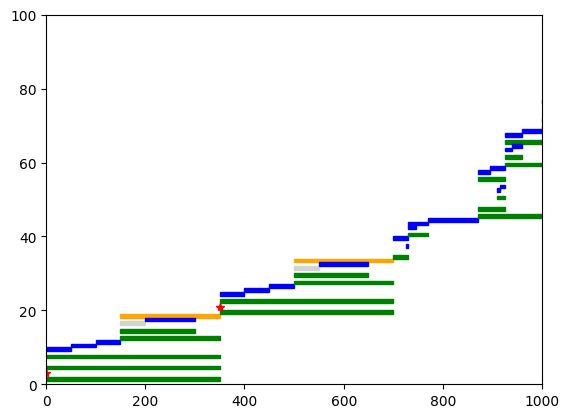

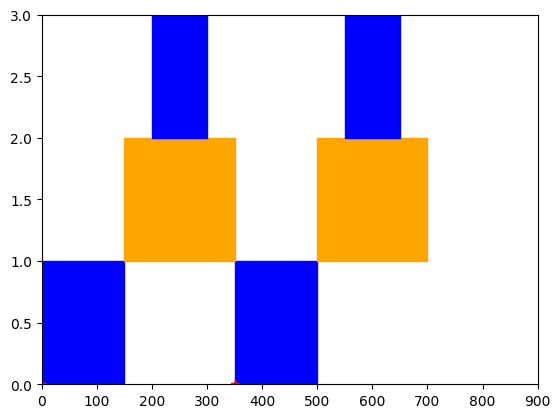

({'CQ1': {1: [Modifier(begin=0.0),
    RaisedCosFlatTop(duration=5e-08, begin=0.0),
    Rectangle(duration=5e-08, begin=5e-08),
    Arbit(duration=5e-08, begin=1e-07)],
   19: [Modifier(begin=3.5e-07),
    Arbit(duration=5e-08, begin=3.5e-07),
    RaisedCosFlatTop(duration=5e-08, begin=4e-07),
    Rectangle(duration=5e-08, begin=4.5e-07)],
   45: []},
  'RQ1CAP': {1: [Range(duration=2e-07, begin=1.5e-07)],
   19: [Range(duration=2e-07, begin=5e-07)],
   45: []},
  'RQ1GEN': {1: [RaisedCosFlatTop(duration=1e-07, begin=2e-07)],
   19: [RaisedCosFlatTop(duration=1e-07, begin=5.5e-07)],
   45: []}},
 {1: SubSequenceBranch(duration=3.5e-07, begin=0.0, next_node=1, root_node=2),
  2: Dummy(begin=0.0),
  3: Modifier(begin=0.0),
  4: FlushrightBranch(duration=3.5e-07, begin=0.0, next_node=4, root_node=5),
  5: Dummy(begin=0.0),
  6: Padding(duration=0.0, begin=0.0),
  7: SeriesBranch(duration=3.5e-07, begin=0.0, next_node=7, root_node=8),
  8: Dummy(begin=0.0),
  9: RaisedCosFlatTop(duration=5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import qubecalib.neopulseexp as pls
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop, TargetHolder, Blank, Range, Branch, SubSequenceBranch
from qubecalib.neopulseexp import Modifier, RaisedCosFlatTop
from typing import Optional
%matplotlib inline

class THSlot(Slot, TargetHolder):
    def __init__(self, duration: Optional[float] = None) -> None:
        super().__init__(duration)
        TargetHolder.__init__(self)

with Sequence() as seq:
    with SubSequence():
        Modifier().set_target("CQ1")
        with Flushright():
            with Series():
                RaisedCosFlatTop(50e-9).set_target("CQ1")
                pls.Rectangle(50e-9).set_target("CQ1")
                pls.Arbit(50e-9).set_target("CQ1")
                with Flushleft():
                    with Series():
                        Blank(50e-9)
                        RaisedCosFlatTop(100e-9).set_target("RQ1GEN")
                    Range(200e-9).set_target("RQ1CAP")
    with SubSequence():
        Modifier().set_target("CQ1")
        # with Flushright():
        with Series():
            pls.Arbit(50e-9).set_target("CQ1")
            RaisedCosFlatTop(50e-9).set_target("CQ1")
            pls.Rectangle(50e-9).set_target("CQ1")
            with Flushleft():
                with Series():
                    Blank(50e-9)
                    RaisedCosFlatTop(100e-9).set_target("RQ1GEN")
                Range(200e-9).set_target("RQ1CAP")
    # Sequence のトップレベルテスト
    with Flushright():
        Slot(5e-9)
        Slot(30e-9)
    with Flushleft():
        Slot(15e-9)
        Slot(40e-9)
    Slot(100e-9)
    # SubSequence の入れ子テスト
    with SubSequence():
        # Flushright の入れ子テスト
        with Flushright():
            with Series():
                Slot(5e-9)
                Slot(10e-9)
            with Series():
                Slot(25e-9)
                Slot(30e-9)
        # Flushleft の入れ子テスト
        with Flushleft():
            with Series():
                Slot(15e-9)
                Slot(20e-9)
            with Series():
                Slot(35e-9)
                Slot(40e-9)
    # Series の入れ子テスト
    with Series():
        # Flushright の入れ子テスト
        with Flushright():
            Slot(5e-9)
            Slot(30e-9)
        # Flushleft の入れ子テスト
        with Flushleft():
            Slot(15e-9)
            Slot(40e-9)

seq._tree.place_slots()

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, Branch):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
        continue
    if isinstance(_, Blank):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='lightgray'))
        continue
    if isinstance(_, Range):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='orange'))
        continue
    if isinstance(_, Modifier):
        ax.plot(_.begin*1e9, i, '*', color='red')
        continue
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
        continue
ax.set_xlim(0,1000)
ax.set_ylim(0,100)
plt.show()

targets_items = seq._get_group_items_by_target()

fig = plt.figure()
ax = fig.gca()
target_counter = 0
for targets, items in targets_items.items():
    for node, _items in items.items():
        for _ in _items:
            if isinstance(_, Branch):
                ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, target_counter), width=_.duration*1e9, height=1, color='green'))
                continue
            if isinstance(_, Blank):
                ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, target_counter), width=_.duration*1e9, height=1, color='lightgray'))
                continue
            if isinstance(_, Range):
                ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, target_counter), width=_.duration*1e9, height=1, color='orange'))
                continue
            if isinstance(_, Modifier):
                ax.plot(_.begin*1e9, target_counter, '*', color='red')
                continue
            if isinstance(_, Slot):
                ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, target_counter), width=_.duration*1e9, height=1, color='blue'))
                continue
    target_counter += 1
ax.set_xlim(0,900)
ax.set_ylim(0,len(targets_items))
plt.show()

targets_items, seq._tree._nodes_items, seq._tree._tree._tree

In [ ]:
for targets, items in targets_items.items():
    for node, _items in items.items():
        for _ in _items:


In [ ]:
{item._root_node: item for item in seq._tree._nodes_items.values() if isinstance(item, SubSequenceBranch)}

In [ ]:
[seq._tree._nodes_items[_] for _ in seq._tree.breadth_first_search(2) if isinstance(seq._tree._nodes_items[_], TargetHolder)]

In [ ]:
{{"a": 1, "duration": 2.5e-7}: "item"}

In [ ]:
{
    "CQ1": {0: ["Slot"], 1: ["Slot", "Slot"]},
}
0: SubSequenceBranch
1: SubSequenceBranch